Importing the required libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importing the dataset

In [23]:
dataset = pd.read_csv('/content/combined_cycle_power_plant.csv', sep=';')

In [24]:
print(dataset)

      temperature  exhaust_vacuum  ambient_pressure  relative_humidity  \
0            9.59           38.56           1017.01              60.10   
1           12.04           42.34           1019.72              94.67   
2           13.87           45.08           1024.42              81.69   
3           13.72           54.30           1017.89              79.08   
4           15.14           49.64           1023.78              75.00   
...           ...             ...               ...                ...   
9563        17.10           49.69           1005.53              81.82   
9564        24.73           65.34           1015.42              52.80   
9565        30.44           56.24           1005.19              56.24   
9566        23.00           66.05           1020.61              80.29   
9567        17.75           49.25           1020.86              63.67   

      energy_output  
0            481.30  
1            465.36  
2            465.48  
3            467.05  
4

In [25]:
dataset.shape

(9568, 5)

In [26]:
dataset.head()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58


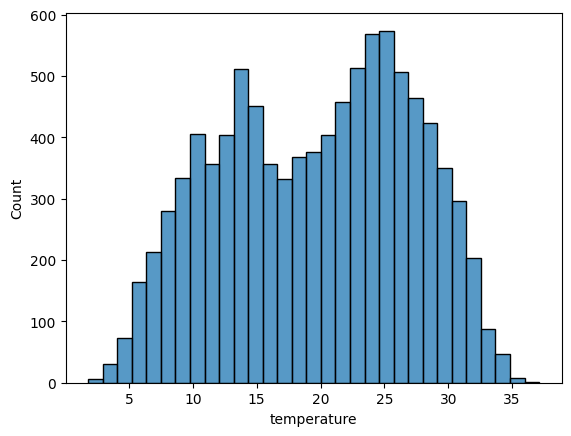

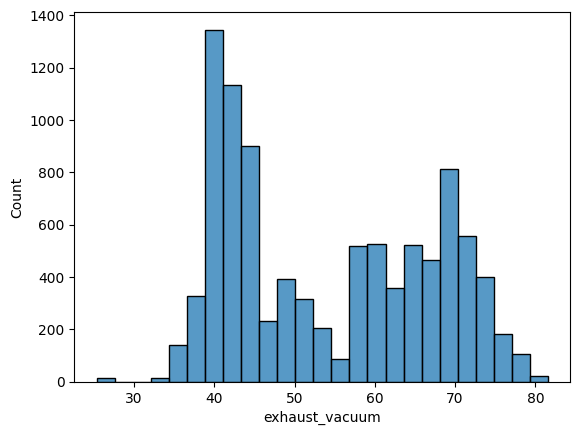

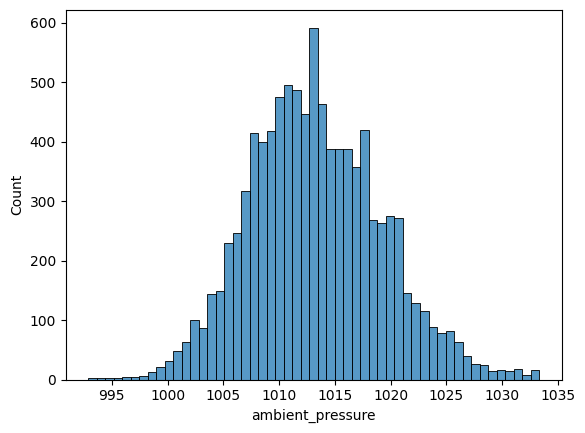

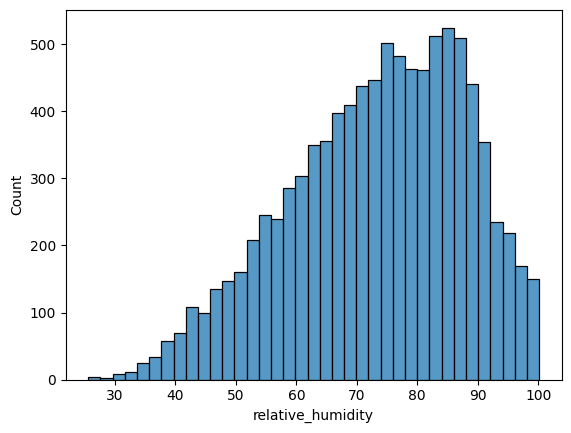

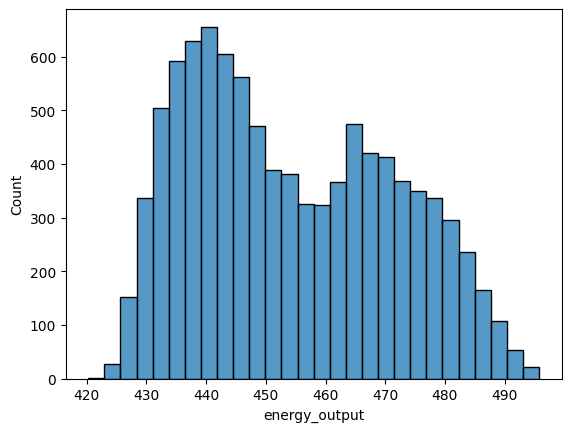

In [27]:
for i in dataset.columns:
  sns.histplot(dataset[i])
  plt.show()

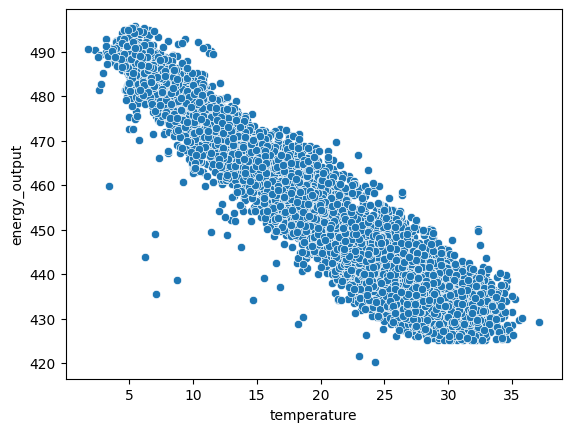

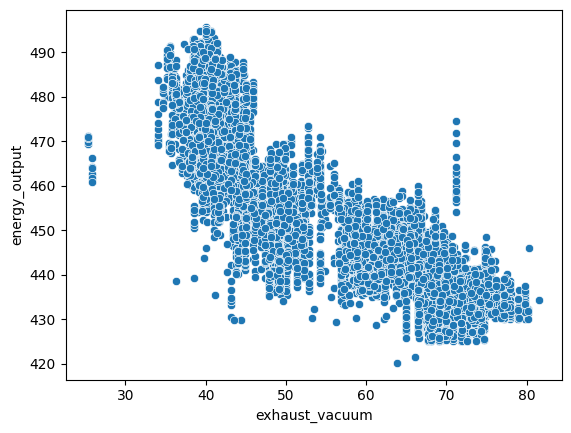

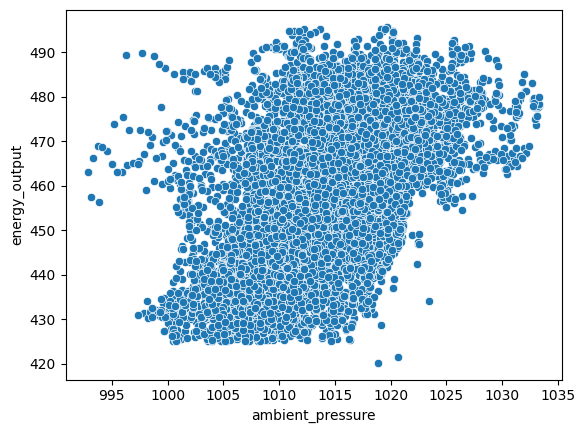

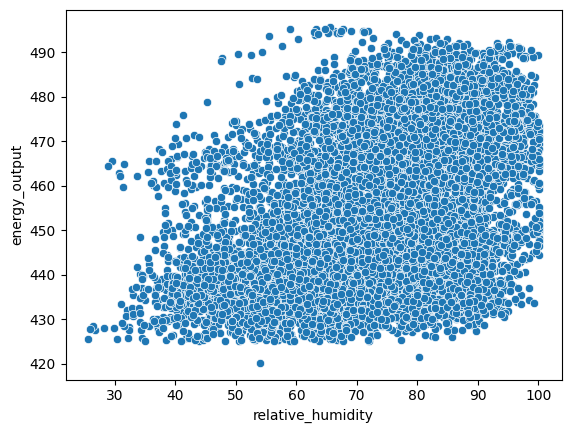

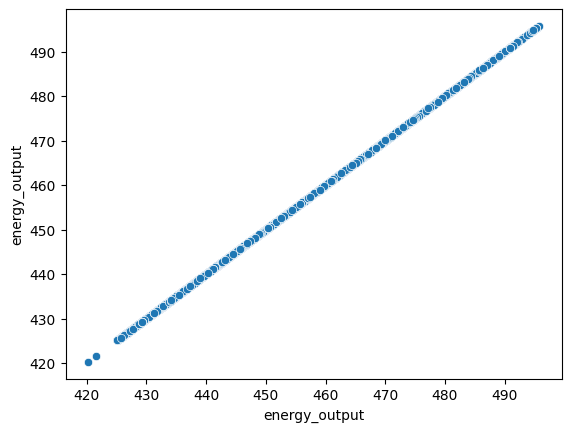

In [28]:
for i in dataset.columns:
  sns.scatterplot(x=dataset[i], y=dataset['energy_output'])
  plt.show()

In [29]:
dataset.corr()

,temperature,exhaust_vacuum,ambient_pressure,relative_humidity,energy_output
temperature,1.000000,0.844107,-0.507549,-0.542535,-0.948128
exhaust_vacuum,0.844107,1.000000,-0.413502,-0.312187,-0.869780
ambient_pressure,-0.507549,-0.413502,1.000000,0.099574,0.518429
relative_humidity,-0.542535,-0.312187,0.099574,1.000000,0.389794
energy_output,-0.948128,-0.869780,0.518429,0.389794,1.000000


Finding the correlation between all the factors

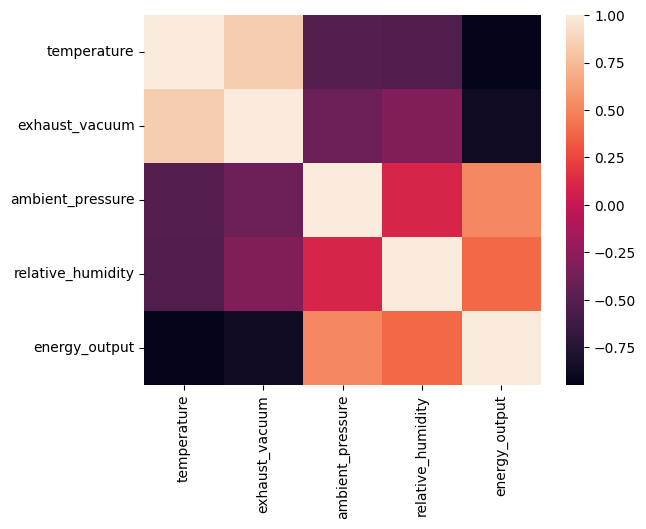

In [30]:
sns.heatmap(dataset.corr())
plt.show()

Splitting the data into dependand and independant

In [32]:
x = dataset.drop('energy_output', axis=1)
y = dataset['energy_output']

Splitting the data into trainin and test

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [36]:
print(x.shape)
print(y.shape)

(9568, 4)
(9568,)


In [38]:
print(x_train.shape)
print(y_train.shape)

(7654, 4)
(7654,)


In [34]:
print(x_test.shape)
print(y_test.shape)

(1914, 4)
(1914,)


Installing the required libraries required to build ANN

In [39]:
!pip install tensorflow

Importing required libraries for ANN

In [42]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Creating the model

In [44]:
model = Sequential()

First hidden layer = input layer

In [50]:
model.add(Dense(50, activation='relu', input_shape=(4,)))

Second hidden layer

In [51]:
model.add(Dense(1, activation='linear'))

The summanry of model

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 50)                250       
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2871 (11.21 KB)
Trainable params: 2871 (11.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Compiling the model

In [56]:
model.compile(optimizer='adam', loss='mse')

Training the model

In [60]:
model.fit(x_train, y_train, epochs=3000)

Streaming output truncated to the last 5000 lines.
240/240 [==============================] - 1s 3ms/step - loss: 26.9794
Epoch 502/3000
240/240 [==============================] - 1s 3ms/step - loss: 27.0856
Epoch 503/3000
240/240 [==============================] - 1s 3ms/step - loss: 27.3989
Epoch 504/3000
240/240 [==============================] - 1s 3ms/step - loss: 27.0213
Epoch 505/3000
240/240 [==============================] - 1s 3ms/step - loss: 27.0067
Epoch 506/3000
240/240 [==============================] - 1s 4ms/step - loss: 27.7325
Epoch 507/3000
240/240 [==============================] - 1s 5ms/step - loss: 27.7006
Epoch 508/3000
240/240 [==============================] - 1s 5ms/step - loss: 28.8605
Epoch 509/3000
240/240 [==============================] - 1s 5ms/step - loss: 27.0590
Epoch 510/3000
240/240 [==============================] - 1s 3ms/step - loss: 26.4038
Epoch 511/3000
240/240 [==============================] - 1s 3ms/step - loss: 27.4518
Epoch 512/3000
240

Predicting the resulit using testing sample

In [63]:
y_pred = model.predict(x_test)

60/60 [==============================] - 0s 2ms/step


In [65]:
from sklearn.metrices import mean_squared_error, r2score

ModuleNotFoundError: ignored

In [ ]:
output = np.sqrt(mean_squared_error(y_test, y_pred))
output

In [ ]:
r2_score = r2score(y_test, y_pred)
print(r2_score)

Exporting the model

In [66]:
model.save('/content/ann-reg.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
